In [1]:
#Ideas
#Track down the incorrect predictions and see where they are in the distribition of the rest of the data
#Softmax function at the output layer?
#Make sure the weight initialization is random each time
#Can you somehow control the weight initialization to make sure its in a small range?

In [2]:
#HYPERPARAMETERS:
#-Activation function
#-Weight initialisation
#-Loss function
#-Training Algorithms
#-Training Algorithm parameters
#-Learning rate

In [3]:
#Previous Configurations

#Model 1
# model = myNN(12,3,{1:20,2:20,3:15,4:10,5:5})

# learning_rate = 0.01
# criterion = nn.MSELoss()
# # criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import random
import copy

In [2]:
with open('almonds_prep.pickle','rb') as file:
    All = pickle.load(file)

In [92]:
def myMSE(pred,true):
    return ((pred-true)**2).mean()

def CELoss(pred,true):
    n_samples = pred.shape[0] #Number of training examples
    n_outputs = pred.shape[1] #Number of outputs
    predd = pred + 1e-16
    log_term = torch.log(predd)
    ans = (true*log_term).sum()/(n_samples*n_outputs)
    
    return ans

def convert(yout):
    y_out = copy.deepcopy(yout)
    for h in range(y_out.shape[0]):
        y_out[h][y_out[h] == y_out[h].max()] = 1
        y_out[h][y_out[h] != y_out[h].max()] = 0
    return y_out

def data_shuffler(X,Y):
    idxs = np.arange(0,len(X))
    random.shuffle(idxs)
    
    X_new = X[idxs]
    Y_new = Y[idxs]
    return X_new,Y_new

def batch_maker(X,Y,num_batches): #X,Y-> shuffled input and outputs
    tot = len(X)
    div = int(np.ceil(tot/num_batches))
#     print(div)
    
    if num_batches == 1:
        return X,Y
    cnt1 = 0
    cnt2 = div
    Xbatch = []
    Ybatch = []
    for i in range(num_batches-1):
        
        Xbatch.append(X[cnt1:cnt2,:])
        Ybatch.append(Y[cnt1:cnt2,:])
        
        cnt1 = cnt2
        cnt2 = cnt1 + div
        
    Xbatch.append(X[cnt1:,:])
    Ybatch.append(Y[cnt1:,:])
    
    return Xbatch,Ybatch

In [12]:
class myNN(nn.Module):
    
    def __init__(self,n_input_features,n_output_features,n_layers_neurons,hidden_activation,output_activation):
        """
        n_input_features = Number of input features
        n_output_features = Number of output features
        n_layers_neurons = Dictionary of HIDDEN layer number and number of neurons in layer
           e.g.  3 hidden layers with 4, 2, and 7 neurons, respectively==> {1:4, 2: 2, 3: 7}
        
        """
        self.activation_function = {"softmax": nn.Softmax,"sigmoid":nn.Sigmoid,"relu":nn.ReLU,"tanh":nn.Tanh}
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        
        super().__init__()
        self.n_hidden_layers = len(list(n_layers_neurons)) #number of hidden layers
        #Creating all the layers
        
        self.layers = nn.ModuleList([nn.Linear(in_features = n_input_features, out_features = n_layers_neurons[1])])#First hidden layer
        
        for n in range(len(n_layers_neurons)-1):
            
            #All hidden layers
            self.layers.append(nn.Linear(in_features = n_layers_neurons[n+1], out_features = n_layers_neurons[n+2]))
            
        self.layers.append(nn.Linear(in_features = n_layers_neurons[list(n_layers_neurons)[-1]], out_features = n_output_features)) #Output layer

        
    def forward(self,x):
        
        #Hidden layers
        ys = []
        ys.append(nn.Tanh()(self.layers[0](x)))
#         print('First layer:',ys)
        for i in range(self.n_hidden_layers - 1):
#             print(i)
            net = self.layers[i+1](ys[i])
            ys.append(nn.Tanh()(net)) #Hidden layers
        
        net_output = self.layers[-1](ys[-1])
        output =nn. Softmax()(net_output)
        return output

In [5]:
Xnum = np.vstack((All[0],All[1],All[2]))
print(Xnum.shape)

(2803, 13)


In [6]:
#Classes: 'MAMRA = [1,0,0]', 'SANORA = [0,1,0]', 'REGULAR' = [0,0,1]
Ynum = []
for n in range(len(Xnum)):
    if Xnum[n,-1] == "MAMRA":
        Ynum.append([1,0,0])
        
    elif Xnum[n,-1] == "SANORA":
        Ynum.append([0,1,0])
        
    elif Xnum[n,-1] == "REGULAR":
        Ynum.append([0,0,1])
        
    else:
        print(f"Error row index: {n}")

Xnum = Xnum[:,:-1]
Ynum = np.array(Ynum)
print(f"Input shape: {Xnum.shape}")
print(f"Output shape: {Ynum.shape}")

Input shape: (2803, 12)
Output shape: (2803, 3)


In [7]:
Xnum_train,Xnum_test,Ynum_train,Ynum_test = train_test_split(Xnum,Ynum,test_size = 0.3)
print("X train: ", Xnum_train.shape)
print("X test: ", Xnum_test.shape)
print("Y train: ", Ynum_train.shape)
print("Y test: ", Ynum_test.shape)

X train:  (1962, 12)
X test:  (841, 12)
Y train:  (1962, 3)
Y test:  (841, 3)


In [8]:
xdata_sc = StandardScaler()
Xnum_train = xdata_sc.fit_transform(Xnum_train)
Xnum_test = xdata_sc.transform(Xnum_test)

X_train = torch.tensor(Xnum_train.astype(np.float32))
Y_train = torch.tensor(Ynum_train.astype(np.float32))

X_test = torch.tensor(Xnum_test.astype(np.float32))
Y_test = torch.tensor(Ynum_test.astype(np.float32))

In [93]:
model = myNN(12,3,{1:20,2:20,3:15,4:10,5:5},'sigmoid','softmax')
# model = myNN(12,3,{1:30,2:25,3:20,4:15,5:10,6:10,7:5})

learning_rate = 1
# criterion = nn.BCELoss()
# criterion = CELoss
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [94]:
num_epochs = 1000
losses_train = [] #Stores training losses at each epoch
losses_test = [] #Stores testing losses at each epocj

num_batches = 2 #Number of training batches 

for epoch in range(num_epochs):
    print(f"=============Epoch no. {epoch + 1}================================")
    
    X_train,Y_train = data_shuffler(X_train,Y_train)
    Xbatches, Ybatches = batch_maker(X_train,Y_train,num_batches)
    
    for iteration in range(num_batches):
        
        X_train_batch = Xbatches[iteration]
        Y_train_batch = Ybatches[iteration]

        #Forward pass
        ypred_train = model(X_train_batch)
        
        #Compute loss
#         loss_train = criterion(ypred_train,Y_train_batch)
        loss_train = nn.CrossEntropyLoss(reduction = 'none')(net2.reshape(1,2),t)/len(net2)

#         loss_train = CELoss(ypred_train,Y_train_batch)

        #Backward pass
        loss_train.backward()
        print(f"Batch no. {iteration + 1}")
        print(f"\n Batch Pred: \n{ypred_train} \n Batch Target: {Y_train_batch}")
        print("Batch Training Loss: ",loss_train)

        #Update weights
        optimizer.step()
        optimizer.zero_grad()
 
    with torch.no_grad():
        
        #Forward pass using entire dataset
        ypred_train_epoch = model(X_train)
        ypred_test_epoch = model(X_test)

        loss_train_epoch = CELoss(ypred_train_epoch,Y_train)
#         loss_train_epoch = criterion(ypred_train_epoch,Y_train)

        losses_train.append(loss_train_epoch)

        loss_test_epoch = CELoss(ypred_test_epoch,Y_test)
#         loss_test_epoch = criterion(ypred_test_epoch,Y_test)
        losses_test.append(loss_test_epoch)
    
        error = ((ypred_train_epoch - Y_train)**2).mean()

    
        if (num_epochs + 1) % 10 == 0:
            print("Epoch {epoch + 1}Done ============================================")
            print(f"Epoch: {num_epochs + 1}\n Epoch Pred: \n{ypred_train_epoch} \n Epoch Target: \n{Y_test} ")
            print("Epoch Training Loss: ",loss_train_epoch)
            print("Epoch Testing Loss: ",loss_test_epoch)
            print("Epoch Error:", error)



losses_train = torch.tensor(losses_train)
losses_test = torch.tensor(losses_test)

print("==="*7)
print("Done")
print("Final Training Loss: ",loss_train_epoch)
print("Final Training Loss: ",loss_test_epoch)
print("==="*7)

# for name, param in model.named_parameters():
#     print(f'Layer: {name} | Size: {param.size()} | Values: {param} \n')
#     print("----"*10)

=============Epoch no. 1================================
Batch no. 1

 Batch Pred: 
tensor([[0.3315, 0.3170, 0.3515],
        [0.3127, 0.3154, 0.3719],
        [0.3141, 0.3272, 0.3587],
        ...,
        [0.2913, 0.3166, 0.3921],
        [0.3190, 0.3170, 0.3639],
        [0.3140, 0.3257, 0.3603]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-0.3637, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[0.2983, 0.3162, 0.3854],
        [0.3056, 0.3182, 0.3762],
        [0.3105, 0.3132, 0.3764],
        ...,
        [0.2905, 0.3164, 0.3931],
        [0.3116, 0.3145, 0.3739],
        [0.3481, 0.3055, 0.3464]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Train

D:\Anaconda_installation\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Batch no. 1

 Batch Pred: 
tensor([[6.5652e-09, 1.6323e-08, 1.0000e+00],
        [6.6068e-09, 1.6385e-08, 1.0000e+00],
        [6.5459e-09, 1.6302e-08, 1.0000e+00],
        ...,
        [6.5590e-09, 1.6282e-08, 1.0000e+00],
        [6.5210e-09, 1.6200e-08, 1.0000e+00],
        [6.5292e-09, 1.6218e-08, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-4.0303, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[9.1208e-10, 2.2902e-09, 1.0000e+00],
        [9.0225e-10, 2.2639e-09, 1.0000e+00],
        [9.0532e-10, 2.2726e-09, 1.0000e+00],
        ...,
        [9.0824e-10, 2.2818e-09, 1.0000e+00],
        [9.0812e-10, 2.2785e-09, 1.0000e+00],
        [9.0467e-10, 2.2753e-09, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
    

Batch no. 1

 Batch Pred: 
tensor([[3.1786e-18, 4.7532e-18, 1.0000e+00],
        [3.1689e-18, 4.7389e-18, 1.0000e+00],
        [3.1732e-18, 4.7447e-18, 1.0000e+00],
        ...,
        [3.1867e-18, 4.7651e-18, 1.0000e+00],
        [3.1844e-18, 4.7641e-18, 1.0000e+00],
        [3.1725e-18, 4.7463e-18, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0159, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.9505e-18, 4.3812e-18, 1.0000e+00],
        [2.9445e-18, 4.3723e-18, 1.0000e+00],
        [2.9659e-18, 4.4036e-18, 1.0000e+00],
        ...,
        [2.9496e-18, 4.3815e-18, 1.0000e+00],
        [2.9543e-18, 4.3869e-18, 1.0000e+00],
        [2.9522e-18, 4.3831e-18, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
    

Batch no. 1

 Batch Pred: 
tensor([[1.3092e-18, 1.7695e-18, 1.0000e+00],
        [1.3060e-18, 1.7648e-18, 1.0000e+00],
        [1.3029e-18, 1.7606e-18, 1.0000e+00],
        ...,
        [1.3079e-18, 1.7675e-18, 1.0000e+00],
        [1.3100e-18, 1.7698e-18, 1.0000e+00],
        [1.3043e-18, 1.7625e-18, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1711, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.2781e-18, 1.7227e-18, 1.0000e+00],
        [1.2718e-18, 1.7146e-18, 1.0000e+00],
        [1.2632e-18, 1.7029e-18, 1.0000e+00],
        ...,
        [1.2694e-18, 1.7115e-18, 1.0000e+00],
        [1.2650e-18, 1.7049e-18, 1.0000e+00],
        [1.2646e-18, 1.7048e-18, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
    


 Batch Pred: 
tensor([[7.4667e-19, 9.6009e-19, 1.0000e+00],
        [7.4965e-19, 9.6394e-19, 1.0000e+00],
        [7.4898e-19, 9.6318e-19, 1.0000e+00],
        ...,
        [7.4841e-19, 9.6265e-19, 1.0000e+00],
        [7.5060e-19, 9.6521e-19, 1.0000e+00],
        [7.4962e-19, 9.6411e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0474, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[7.3914e-19, 9.4870e-19, 1.0000e+00],
        [7.3648e-19, 9.4552e-19, 1.0000e+00],
        [7.3531e-19, 9.4385e-19, 1.0000e+00],
        ...,
        [7.3679e-19, 9.4584e-19, 1.0000e+00],
        [7.3661e-19, 9.4563e-19, 1.0000e+00],
        [7.3658e-19, 9.4557e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
   


 Batch Pred: 
tensor([[5.6450e-19, 7.1029e-19, 1.0000e+00],
        [5.6602e-19, 7.1213e-19, 1.0000e+00],
        [5.6584e-19, 7.1206e-19, 1.0000e+00],
        ...,
        [5.6461e-19, 7.1070e-19, 1.0000e+00],
        [5.6661e-19, 7.1307e-19, 1.0000e+00],
        [5.6562e-19, 7.1180e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0103, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[5.6081e-19, 7.0538e-19, 1.0000e+00],
        [5.5863e-19, 7.0248e-19, 1.0000e+00],
        [5.5957e-19, 7.0356e-19, 1.0000e+00],
        ...,
        [5.5763e-19, 7.0127e-19, 1.0000e+00],
        [5.5833e-19, 7.0219e-19, 1.0000e+00],
        [5.5805e-19, 7.0175e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
   

Batch no. 1

 Batch Pred: 
tensor([[4.2996e-19, 5.3072e-19, 1.0000e+00],
        [4.2847e-19, 5.2900e-19, 1.0000e+00],
        [4.2898e-19, 5.2950e-19, 1.0000e+00],
        ...,
        [4.3002e-19, 5.3096e-19, 1.0000e+00],
        [4.3000e-19, 5.3099e-19, 1.0000e+00],
        [4.2998e-19, 5.3099e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0232, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.2574e-19, 5.2530e-19, 1.0000e+00],
        [4.2495e-19, 5.2433e-19, 1.0000e+00],
        [4.2663e-19, 5.2637e-19, 1.0000e+00],
        ...,
        [4.2678e-19, 5.2655e-19, 1.0000e+00],
        [4.2511e-19, 5.2452e-19, 1.0000e+00],
        [4.2702e-19, 5.2686e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
    

Batch Training Loss:  tensor(-8.4365, grad_fn=<DivBackward0>)
=============Epoch no. 82================================
Batch no. 1

 Batch Pred: 
tensor([[3.4388e-19, 4.1830e-19, 1.0000e+00],
        [3.4274e-19, 4.1709e-19, 1.0000e+00],
        [3.4469e-19, 4.1924e-19, 1.0000e+00],
        ...,
        [3.4074e-19, 4.1449e-19, 1.0000e+00],
        [3.4223e-19, 4.1628e-19, 1.0000e+00],
        [3.4150e-19, 4.1555e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.9984, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.3904e-19, 4.1211e-19, 1.0000e+00],
        [3.3909e-19, 4.1223e-19, 1.0000e+00],
        [3.4028e-19, 4.1372e-19, 1.0000e+00],
        ...,
        [3.3970e-19, 4.1296e-19, 1.0000e+00],
        [3.3906e-19, 4.1227e-19, 1.0000e+00],
        [3.4040e-19, 4.1381e-19, 1.0000e+


 Batch Pred: 
tensor([[2.9074e-19, 3.5028e-19, 1.0000e+00],
        [2.9107e-19, 3.5076e-19, 1.0000e+00],
        [2.9085e-19, 3.5040e-19, 1.0000e+00],
        ...,
        [2.9131e-19, 3.5105e-19, 1.0000e+00],
        [2.9156e-19, 3.5138e-19, 1.0000e+00],
        [2.9110e-19, 3.5079e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0486, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.8965e-19, 3.4878e-19, 1.0000e+00],
        [2.8996e-19, 3.4930e-19, 1.0000e+00],
        [2.8917e-19, 3.4830e-19, 1.0000e+00],
        ...,
        [2.9051e-19, 3.4995e-19, 1.0000e+00],
        [2.8944e-19, 3.4858e-19, 1.0000e+00],
        [2.8901e-19, 3.4805e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
   


 Batch Pred: 
tensor([[2.5483e-19, 3.0475e-19, 1.0000e+00],
        [2.5522e-19, 3.0521e-19, 1.0000e+00],
        [2.5447e-19, 3.0434e-19, 1.0000e+00],
        ...,
        [2.5453e-19, 3.0447e-19, 1.0000e+00],
        [2.5466e-19, 3.0464e-19, 1.0000e+00],
        [2.5506e-19, 3.0509e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1989, grad_fn=<DivBackward0>)
=============Epoch no. 106================================
Batch no. 1

 Batch Pred: 
tensor([[2.5299e-19, 3.0242e-19, 1.0000e+00],
        [2.5344e-19, 3.0290e-19, 1.0000e+00],
        [2.5487e-19, 3.0477e-19, 1.0000e+00],
        ...,
        [2.5480e-19, 3.0469e-19, 1.0000e+00],
        [2.5379e-19, 3.0340e-19, 1.0000e+00],
        [2.5382e-19, 3.0350e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch no. 1

 Batch Pred: 
tensor([[2.2502e-19, 2.6721e-19, 1.0000e+00],
        [2.2388e-19, 2.6588e-19, 1.0000e+00],
        [2.2507e-19, 2.6730e-19, 1.0000e+00],
        ...,
        [2.2479e-19, 2.6691e-19, 1.0000e+00],
        [2.2524e-19, 2.6747e-19, 1.0000e+00],
        [2.2434e-19, 2.6644e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1364, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.2357e-19, 2.6540e-19, 1.0000e+00],
        [2.2368e-19, 2.6559e-19, 1.0000e+00],
        [2.2376e-19, 2.6564e-19, 1.0000e+00],
        ...,
        [2.2381e-19, 2.6572e-19, 1.0000e+00],
        [2.2344e-19, 2.6533e-19, 1.0000e+00],
        [2.2414e-19, 2.6607e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
    

Batch no. 1

 Batch Pred: 
tensor([[2.0595e-19, 2.4335e-19, 1.0000e+00],
        [2.0562e-19, 2.4303e-19, 1.0000e+00],
        [2.0558e-19, 2.4300e-19, 1.0000e+00],
        ...,
        [2.0564e-19, 2.4313e-19, 1.0000e+00],
        [2.0542e-19, 2.4277e-19, 1.0000e+00],
        [2.0528e-19, 2.4260e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.3116, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.0453e-19, 2.4164e-19, 1.0000e+00],
        [2.0523e-19, 2.4260e-19, 1.0000e+00],
        [2.0380e-19, 2.4084e-19, 1.0000e+00],
        ...,
        [2.0420e-19, 2.4127e-19, 1.0000e+00],
        [2.0454e-19, 2.4166e-19, 1.0000e+00],
        [2.0384e-19, 2.4087e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
    

Batch Training Loss:  tensor(-8.2116, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.8432e-19, 2.1665e-19, 1.0000e+00],
        [1.8363e-19, 2.1583e-19, 1.0000e+00],
        [1.8389e-19, 2.1613e-19, 1.0000e+00],
        ...,
        [1.8389e-19, 2.1612e-19, 1.0000e+00],
        [1.8381e-19, 2.1605e-19, 1.0000e+00],
        [1.8359e-19, 2.1578e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.9862, grad_fn=<DivBackward0>)
=============Epoch no. 142================================
Batch no. 1

 Batch Pred: 
tensor([[1.8307e-19, 2.1512e-19, 1.0000e+00],
        [1.8313e-19, 2.1520e-19, 1.0000e+00],
        [1.8383e-19, 2.1602e-19, 1.0000e+00],
        ...,
        [1.8356e-19, 2.1577e-19, 1.0000e+00],
        [1.8342e-19, 2.1557e-19, 1.0000e+00],
        [1.8325e-19, 2.1539e-19, 1.0000e

Batch Training Loss:  tensor(-7.9988, grad_fn=<DivBackward0>)
=============Epoch no. 154================================
Batch no. 1

 Batch Pred: 
tensor([[1.6712e-19, 1.9555e-19, 1.0000e+00],
        [1.6776e-19, 1.9625e-19, 1.0000e+00],
        [1.6826e-19, 1.9682e-19, 1.0000e+00],
        ...,
        [1.6802e-19, 1.9662e-19, 1.0000e+00],
        [1.6733e-19, 1.9576e-19, 1.0000e+00],
        [1.6716e-19, 1.9558e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.4494, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.6698e-19, 1.9531e-19, 1.0000e+00],
        [1.6710e-19, 1.9554e-19, 1.0000e+00],
        [1.6750e-19, 1.9601e-19, 1.0000e+00],
        ...,
        [1.6745e-19, 1.9584e-19, 1.0000e+00],
        [1.6648e-19, 1.9476e-19, 1.0000e+00],
        [1.6728e-19, 1.9575e-19, 1.0000e

Batch no. 2

 Batch Pred: 
tensor([[1.5517e-19, 1.8086e-19, 1.0000e+00],
        [1.5514e-19, 1.8083e-19, 1.0000e+00],
        [1.5518e-19, 1.8085e-19, 1.0000e+00],
        ...,
        [1.5577e-19, 1.8161e-19, 1.0000e+00],
        [1.5618e-19, 1.8201e-19, 1.0000e+00],
        [1.5567e-19, 1.8142e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1240, grad_fn=<DivBackward0>)
=============Epoch no. 166================================
Batch no. 1

 Batch Pred: 
tensor([[1.5469e-19, 1.8028e-19, 1.0000e+00],
        [1.5500e-19, 1.8066e-19, 1.0000e+00],
        [1.5453e-19, 1.8007e-19, 1.0000e+00],
        ...,
        [1.5421e-19, 1.7972e-19, 1.0000e+00],
        [1.5542e-19, 1.8111e-19, 1.0000e+00],
        [1.5531e-19, 1.8105e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0.

Batch Training Loss:  tensor(-7.9613, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.4607e-19, 1.6976e-19, 1.0000e+00],
        [1.4551e-19, 1.6912e-19, 1.0000e+00],
        [1.4527e-19, 1.6883e-19, 1.0000e+00],
        ...,
        [1.4556e-19, 1.6920e-19, 1.0000e+00],
        [1.4583e-19, 1.6951e-19, 1.0000e+00],
        [1.4550e-19, 1.6911e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.2367, grad_fn=<DivBackward0>)
=============Epoch no. 176================================
Batch no. 1

 Batch Pred: 
tensor([[1.4499e-19, 1.6849e-19, 1.0000e+00],
        [1.4547e-19, 1.6910e-19, 1.0000e+00],
        [1.4505e-19, 1.6854e-19, 1.0000e+00],
        ...,
        [1.4520e-19, 1.6874e-19, 1.0000e+00],
        [1.4535e-19, 1.6895e-19, 1.0000e+00],
        [1.4552e-19, 1.6915e-19, 1.0000e

Batch no. 1

 Batch Pred: 
tensor([[1.3698e-19, 1.5870e-19, 1.0000e+00],
        [1.3696e-19, 1.5871e-19, 1.0000e+00],
        [1.3633e-19, 1.5801e-19, 1.0000e+00],
        ...,
        [1.3596e-19, 1.5758e-19, 1.0000e+00],
        [1.3682e-19, 1.5851e-19, 1.0000e+00],
        [1.3630e-19, 1.5799e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1366, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.3544e-19, 1.5692e-19, 1.0000e+00],
        [1.3567e-19, 1.5717e-19, 1.0000e+00],
        [1.3574e-19, 1.5731e-19, 1.0000e+00],
        ...,
        [1.3603e-19, 1.5760e-19, 1.0000e+00],
        [1.3554e-19, 1.5701e-19, 1.0000e+00],
        [1.3587e-19, 1.5739e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
    


 Batch Pred: 
tensor([[1.2737e-19, 1.4712e-19, 1.0000e+00],
        [1.2701e-19, 1.4671e-19, 1.0000e+00],
        [1.2735e-19, 1.4710e-19, 1.0000e+00],
        ...,
        [1.2717e-19, 1.4689e-19, 1.0000e+00],
        [1.2728e-19, 1.4701e-19, 1.0000e+00],
        [1.2705e-19, 1.4673e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0740, grad_fn=<DivBackward0>)
=============Epoch no. 200================================
Batch no. 1

 Batch Pred: 
tensor([[1.2665e-19, 1.4627e-19, 1.0000e+00],
        [1.2684e-19, 1.4655e-19, 1.0000e+00],
        [1.2674e-19, 1.4641e-19, 1.0000e+00],
        ...,
        [1.2651e-19, 1.4610e-19, 1.0000e+00],
        [1.2675e-19, 1.4644e-19, 1.0000e+00],
        [1.2685e-19, 1.4650e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 

Batch no. 1

 Batch Pred: 
tensor([[1.1929e-19, 1.3742e-19, 1.0000e+00],
        [1.1921e-19, 1.3730e-19, 1.0000e+00],
        [1.1931e-19, 1.3742e-19, 1.0000e+00],
        ...,
        [1.1934e-19, 1.3747e-19, 1.0000e+00],
        [1.1911e-19, 1.3721e-19, 1.0000e+00],
        [1.1927e-19, 1.3739e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0114, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.1918e-19, 1.3724e-19, 1.0000e+00],
        [1.1892e-19, 1.3697e-19, 1.0000e+00],
        [1.1964e-19, 1.3781e-19, 1.0000e+00],
        ...,
        [1.1877e-19, 1.3682e-19, 1.0000e+00],
        [1.1911e-19, 1.3717e-19, 1.0000e+00],
        [1.1887e-19, 1.3691e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
    


 Batch Pred: 
tensor([[1.1216e-19, 1.2890e-19, 1.0000e+00],
        [1.1176e-19, 1.2843e-19, 1.0000e+00],
        [1.1234e-19, 1.2912e-19, 1.0000e+00],
        ...,
        [1.1180e-19, 1.2842e-19, 1.0000e+00],
        [1.1158e-19, 1.2819e-19, 1.0000e+00],
        [1.1156e-19, 1.2815e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.9864, grad_fn=<DivBackward0>)
=============Epoch no. 226================================
Batch no. 1

 Batch Pred: 
tensor([[1.1151e-19, 1.2810e-19, 1.0000e+00],
        [1.1138e-19, 1.2793e-19, 1.0000e+00],
        [1.1140e-19, 1.2799e-19, 1.0000e+00],
        ...,
        [1.1164e-19, 1.2822e-19, 1.0000e+00],
        [1.1142e-19, 1.2803e-19, 1.0000e+00],
        [1.1138e-19, 1.2793e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 

Batch no. 1

 Batch Pred: 
tensor([[1.0554e-19, 1.2097e-19, 1.0000e+00],
        [1.0567e-19, 1.2109e-19, 1.0000e+00],
        [1.0554e-19, 1.2096e-19, 1.0000e+00],
        ...,
        [1.0575e-19, 1.2123e-19, 1.0000e+00],
        [1.0570e-19, 1.2113e-19, 1.0000e+00],
        [1.0563e-19, 1.2105e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.2243, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.0596e-19, 1.2140e-19, 1.0000e+00],
        [1.0554e-19, 1.2095e-19, 1.0000e+00],
        [1.0526e-19, 1.2063e-19, 1.0000e+00],
        ...,
        [1.0585e-19, 1.2135e-19, 1.0000e+00],
        [1.0558e-19, 1.2102e-19, 1.0000e+00],
        [1.0531e-19, 1.2067e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
    

=============Epoch no. 248================================
Batch no. 1

 Batch Pred: 
tensor([[1.0124e-19, 1.1583e-19, 1.0000e+00],
        [1.0074e-19, 1.1527e-19, 1.0000e+00],
        [1.0134e-19, 1.1595e-19, 1.0000e+00],
        ...,
        [1.0110e-19, 1.1565e-19, 1.0000e+00],
        [1.0116e-19, 1.1573e-19, 1.0000e+00],
        [1.0118e-19, 1.1573e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1241, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[1.0101e-19, 1.1555e-19, 1.0000e+00],
        [1.0062e-19, 1.1512e-19, 1.0000e+00],
        [1.0107e-19, 1.1562e-19, 1.0000e+00],
        ...,
        [1.0113e-19, 1.1569e-19, 1.0000e+00],
        [1.0123e-19, 1.1578e-19, 1.0000e+00],
        [1.0106e-19, 1.1560e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0.


 Batch Pred: 
tensor([[9.6795e-20, 1.1050e-19, 1.0000e+00],
        [9.6273e-20, 1.0994e-19, 1.0000e+00],
        [9.6742e-20, 1.1044e-19, 1.0000e+00],
        ...,
        [9.6091e-20, 1.0971e-19, 1.0000e+00],
        [9.6408e-20, 1.1008e-19, 1.0000e+00],
        [9.6156e-20, 1.0978e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.2869, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[9.5987e-20, 1.0958e-19, 1.0000e+00],
        [9.6201e-20, 1.0983e-19, 1.0000e+00],
        [9.6237e-20, 1.0988e-19, 1.0000e+00],
        ...,
        [9.6028e-20, 1.0963e-19, 1.0000e+00],
        [9.6247e-20, 1.0987e-19, 1.0000e+00],
        [9.5814e-20, 1.0941e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
   

Batch no. 1

 Batch Pred: 
tensor([[9.1786e-20, 1.0464e-19, 1.0000e+00],
        [9.1734e-20, 1.0454e-19, 1.0000e+00],
        [9.1865e-20, 1.0469e-19, 1.0000e+00],
        ...,
        [9.1927e-20, 1.0476e-19, 1.0000e+00],
        [9.1826e-20, 1.0465e-19, 1.0000e+00],
        [9.1736e-20, 1.0455e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.2118, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[9.1634e-20, 1.0443e-19, 1.0000e+00],
        [9.1811e-20, 1.0463e-19, 1.0000e+00],
        [9.1862e-20, 1.0470e-19, 1.0000e+00],
        ...,
        [9.1842e-20, 1.0465e-19, 1.0000e+00],
        [9.1544e-20, 1.0434e-19, 1.0000e+00],
        [9.1700e-20, 1.0453e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
    

Batch no. 1

 Batch Pred: 
tensor([[8.8988e-20, 1.0131e-19, 1.0000e+00],
        [8.9264e-20, 1.0164e-19, 1.0000e+00],
        [8.9452e-20, 1.0181e-19, 1.0000e+00],
        ...,
        [8.9575e-20, 1.0196e-19, 1.0000e+00],
        [8.9194e-20, 1.0153e-19, 1.0000e+00],
        [8.9312e-20, 1.0166e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0115, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[8.9090e-20, 1.0140e-19, 1.0000e+00],
        [8.8863e-20, 1.0116e-19, 1.0000e+00],
        [8.9204e-20, 1.0153e-19, 1.0000e+00],
        ...,
        [8.8855e-20, 1.0113e-19, 1.0000e+00],
        [8.9393e-20, 1.0176e-19, 1.0000e+00],
        [8.8719e-20, 1.0100e-19, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
    

Batch no. 2

 Batch Pred: 
tensor([[8.6262e-20, 9.8078e-20, 1.0000e+00],
        [8.6122e-20, 9.7917e-20, 1.0000e+00],
        [8.6199e-20, 9.8003e-20, 1.0000e+00],
        ...,
        [8.6359e-20, 9.8193e-20, 1.0000e+00],
        [8.6410e-20, 9.8234e-20, 1.0000e+00],
        [8.6387e-20, 9.8212e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0741, grad_fn=<DivBackward0>)
=============Epoch no. 289================================
Batch no. 1

 Batch Pred: 
tensor([[8.6273e-20, 9.8082e-20, 1.0000e+00],
        [8.6715e-20, 9.8613e-20, 1.0000e+00],
        [8.6222e-20, 9.8038e-20, 1.0000e+00],
        ...,
        [8.6250e-20, 9.8059e-20, 1.0000e+00],
        [8.6138e-20, 9.7949e-20, 1.0000e+00],
        [8.6131e-20, 9.7937e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0.

Batch no. 1

 Batch Pred: 
tensor([[8.3165e-20, 9.4434e-20, 1.0000e+00],
        [8.3440e-20, 9.4746e-20, 1.0000e+00],
        [8.3399e-20, 9.4685e-20, 1.0000e+00],
        ...,
        [8.3289e-20, 9.4567e-20, 1.0000e+00],
        [8.3331e-20, 9.4615e-20, 1.0000e+00],
        [8.3322e-20, 9.4595e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.3370, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[8.3162e-20, 9.4404e-20, 1.0000e+00],
        [8.3254e-20, 9.4516e-20, 1.0000e+00],
        [8.3447e-20, 9.4713e-20, 1.0000e+00],
        ...,
        [8.3050e-20, 9.4282e-20, 1.0000e+00],
        [8.3144e-20, 9.4392e-20, 1.0000e+00],
        [8.3372e-20, 9.4662e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
    


 Batch Pred: 
tensor([[8.0147e-20, 9.0866e-20, 1.0000e+00],
        [8.0268e-20, 9.1001e-20, 1.0000e+00],
        [8.0048e-20, 9.0742e-20, 1.0000e+00],
        ...,
        [8.0260e-20, 9.0987e-20, 1.0000e+00],
        [8.0313e-20, 9.1085e-20, 1.0000e+00],
        [8.0435e-20, 9.1217e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0992, grad_fn=<DivBackward0>)
=============Epoch no. 311================================
Batch no. 1

 Batch Pred: 
tensor([[8.0338e-20, 9.1118e-20, 1.0000e+00],
        [8.0229e-20, 9.0936e-20, 1.0000e+00],
        [7.9774e-20, 9.0427e-20, 1.0000e+00],
        ...,
        [8.0255e-20, 9.0975e-20, 1.0000e+00],
        [8.0053e-20, 9.0741e-20, 1.0000e+00],
        [7.9780e-20, 9.0435e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
 


 Batch Pred: 
tensor([[7.7003e-20, 8.7190e-20, 1.0000e+00],
        [7.6688e-20, 8.6796e-20, 1.0000e+00],
        [7.6793e-20, 8.6922e-20, 1.0000e+00],
        ...,
        [7.6512e-20, 8.6610e-20, 1.0000e+00],
        [7.6728e-20, 8.6841e-20, 1.0000e+00],
        [7.6877e-20, 8.7014e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0741, grad_fn=<DivBackward0>)
=============Epoch no. 324================================
Batch no. 1

 Batch Pred: 
tensor([[7.6860e-20, 8.6989e-20, 1.0000e+00],
        [7.6658e-20, 8.6762e-20, 1.0000e+00],
        [7.6460e-20, 8.6547e-20, 1.0000e+00],
        ...,
        [7.6721e-20, 8.6876e-20, 1.0000e+00],
        [7.6426e-20, 8.6507e-20, 1.0000e+00],
        [7.6642e-20, 8.6757e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 


 Batch Pred: 
tensor([[7.3819e-20, 8.3455e-20, 1.0000e+00],
        [7.3516e-20, 8.3086e-20, 1.0000e+00],
        [7.3338e-20, 8.2892e-20, 1.0000e+00],
        ...,
        [7.3704e-20, 8.3303e-20, 1.0000e+00],
        [7.3691e-20, 8.3315e-20, 1.0000e+00],
        [7.4037e-20, 8.3660e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0866, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[7.3414e-20, 8.2965e-20, 1.0000e+00],
        [7.3356e-20, 8.2926e-20, 1.0000e+00],
        [7.3743e-20, 8.3324e-20, 1.0000e+00],
        ...,
        [7.3624e-20, 8.3188e-20, 1.0000e+00],
        [7.3582e-20, 8.3175e-20, 1.0000e+00],
        [7.3338e-20, 8.2880e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
   


 Batch Pred: 
tensor([[7.0598e-20, 7.9680e-20, 1.0000e+00],
        [7.0749e-20, 7.9851e-20, 1.0000e+00],
        [7.0763e-20, 7.9861e-20, 1.0000e+00],
        ...,
        [7.0718e-20, 7.9812e-20, 1.0000e+00],
        [7.1161e-20, 8.0307e-20, 1.0000e+00],
        [7.0585e-20, 7.9661e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.2369, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[7.0602e-20, 7.9671e-20, 1.0000e+00],
        [7.0671e-20, 7.9748e-20, 1.0000e+00],
        [7.0807e-20, 7.9917e-20, 1.0000e+00],
        ...,
        [7.0690e-20, 7.9775e-20, 1.0000e+00],
        [7.1168e-20, 8.0347e-20, 1.0000e+00],
        [7.0656e-20, 7.9729e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
   


 Batch Pred: 
tensor([[6.8532e-20, 7.7260e-20, 1.0000e+00],
        [6.8560e-20, 7.7285e-20, 1.0000e+00],
        [6.8595e-20, 7.7355e-20, 1.0000e+00],
        ...,
        [6.8628e-20, 7.7364e-20, 1.0000e+00],
        [6.8929e-20, 7.7716e-20, 1.0000e+00],
        [6.8544e-20, 7.7268e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1242, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[6.8489e-20, 7.7200e-20, 1.0000e+00],
        [6.8438e-20, 7.7146e-20, 1.0000e+00],
        [6.8622e-20, 7.7360e-20, 1.0000e+00],
        ...,
        [6.8674e-20, 7.7403e-20, 1.0000e+00],
        [6.8687e-20, 7.7417e-20, 1.0000e+00],
        [6.8363e-20, 7.7054e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
   

Batch no. 1

 Batch Pred: 
tensor([[6.5724e-20, 7.4002e-20, 1.0000e+00],
        [6.5883e-20, 7.4176e-20, 1.0000e+00],
        [6.6056e-20, 7.4395e-20, 1.0000e+00],
        ...,
        [6.6149e-20, 7.4466e-20, 1.0000e+00],
        [6.5925e-20, 7.4210e-20, 1.0000e+00],
        [6.6007e-20, 7.4312e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1493, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[6.5776e-20, 7.4043e-20, 1.0000e+00],
        [6.5834e-20, 7.4118e-20, 1.0000e+00],
        [6.6038e-20, 7.4348e-20, 1.0000e+00],
        ...,
        [6.5965e-20, 7.4268e-20, 1.0000e+00],
        [6.5655e-20, 7.3910e-20, 1.0000e+00],
        [6.6035e-20, 7.4357e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
    


 Batch Pred: 
tensor([[6.3664e-20, 7.1597e-20, 1.0000e+00],
        [6.3666e-20, 7.1597e-20, 1.0000e+00],
        [6.3808e-20, 7.1746e-20, 1.0000e+00],
        ...,
        [6.4070e-20, 7.2059e-20, 1.0000e+00],
        [6.3716e-20, 7.1657e-20, 1.0000e+00],
        [6.3781e-20, 7.1729e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0241, grad_fn=<DivBackward0>)
=============Epoch no. 388================================
Batch no. 1

 Batch Pred: 
tensor([[6.3724e-20, 7.1662e-20, 1.0000e+00],
        [6.3788e-20, 7.1715e-20, 1.0000e+00],
        [6.3611e-20, 7.1515e-20, 1.0000e+00],
        ...,
        [6.3793e-20, 7.1759e-20, 1.0000e+00],
        [6.3823e-20, 7.1767e-20, 1.0000e+00],
        [6.3805e-20, 7.1766e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch Training Loss:  tensor(-8.0241, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[6.1661e-20, 6.9248e-20, 1.0000e+00],
        [6.1667e-20, 6.9268e-20, 1.0000e+00],
        [6.1658e-20, 6.9241e-20, 1.0000e+00],
        ...,
        [6.1641e-20, 6.9223e-20, 1.0000e+00],
        [6.1790e-20, 6.9397e-20, 1.0000e+00],
        [6.1777e-20, 6.9380e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1743, grad_fn=<DivBackward0>)
=============Epoch no. 401================================
Batch no. 1

 Batch Pred: 
tensor([[6.1435e-20, 6.8998e-20, 1.0000e+00],
        [6.1739e-20, 6.9341e-20, 1.0000e+00],
        [6.1995e-20, 6.9602e-20, 1.0000e+00],
        ...,
        [6.1422e-20, 6.8986e-20, 1.0000e+00],
        [6.1586e-20, 6.9162e-20, 1.0000e+00],
        [6.1418e-20, 6.8982e-20, 1.0000e


 Batch Pred: 
tensor([[5.9991e-20, 6.7312e-20, 1.0000e+00],
        [6.0088e-20, 6.7417e-20, 1.0000e+00],
        [6.0121e-20, 6.7459e-20, 1.0000e+00],
        ...,
        [6.0304e-20, 6.7660e-20, 1.0000e+00],
        [6.0145e-20, 6.7491e-20, 1.0000e+00],
        [6.0342e-20, 6.7694e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.8488, grad_fn=<DivBackward0>)
=============Epoch no. 412================================
Batch no. 1

 Batch Pred: 
tensor([[5.9925e-20, 6.7260e-20, 1.0000e+00],
        [6.0068e-20, 6.7406e-20, 1.0000e+00],
        [5.9955e-20, 6.7263e-20, 1.0000e+00],
        ...,
        [5.9882e-20, 6.7192e-20, 1.0000e+00],
        [5.9813e-20, 6.7106e-20, 1.0000e+00],
        [5.9899e-20, 6.7206e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
 


 Batch Pred: 
tensor([[5.7640e-20, 6.4600e-20, 1.0000e+00],
        [5.7783e-20, 6.4753e-20, 1.0000e+00],
        [5.7702e-20, 6.4670e-20, 1.0000e+00],
        ...,
        [5.7964e-20, 6.4952e-20, 1.0000e+00],
        [5.7702e-20, 6.4684e-20, 1.0000e+00],
        [5.7774e-20, 6.4751e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0366, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[5.7834e-20, 6.4806e-20, 1.0000e+00],
        [5.7745e-20, 6.4719e-20, 1.0000e+00],
        [5.7655e-20, 6.4627e-20, 1.0000e+00],
        ...,
        [5.7778e-20, 6.4777e-20, 1.0000e+00],
        [5.7779e-20, 6.4746e-20, 1.0000e+00],
        [5.7759e-20, 6.4720e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
   

Batch no. 2

 Batch Pred: 
tensor([[5.6277e-20, 6.3012e-20, 1.0000e+00],
        [5.6200e-20, 6.2936e-20, 1.0000e+00],
        [5.6514e-20, 6.3279e-20, 1.0000e+00],
        ...,
        [5.6331e-20, 6.3085e-20, 1.0000e+00],
        [5.6456e-20, 6.3239e-20, 1.0000e+00],
        [5.6487e-20, 6.3262e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.8238, grad_fn=<DivBackward0>)
=============Epoch no. 438================================
Batch no. 1

 Batch Pred: 
tensor([[5.6685e-20, 6.3469e-20, 1.0000e+00],
        [5.6409e-20, 6.3166e-20, 1.0000e+00],
        [5.6169e-20, 6.2892e-20, 1.0000e+00],
        ...,
        [5.6724e-20, 6.3528e-20, 1.0000e+00],
        [5.6095e-20, 6.2816e-20, 1.0000e+00],
        [5.6452e-20, 6.3207e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1.


 Batch Pred: 
tensor([[5.4639e-20, 6.1120e-20, 1.0000e+00],
        [5.4671e-20, 6.1160e-20, 1.0000e+00],
        [5.4984e-20, 6.1495e-20, 1.0000e+00],
        ...,
        [5.4845e-20, 6.1355e-20, 1.0000e+00],
        [5.4766e-20, 6.1263e-20, 1.0000e+00],
        [5.4840e-20, 6.1348e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.3120, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[5.4680e-20, 6.1166e-20, 1.0000e+00],
        [5.4648e-20, 6.1129e-20, 1.0000e+00],
        [5.4720e-20, 6.1218e-20, 1.0000e+00],
        ...,
        [5.4527e-20, 6.1007e-20, 1.0000e+00],
        [5.4993e-20, 6.1553e-20, 1.0000e+00],
        [5.4605e-20, 6.1081e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
   

Batch no. 1

 Batch Pred: 
tensor([[5.3436e-20, 5.9717e-20, 1.0000e+00],
        [5.3082e-20, 5.9323e-20, 1.0000e+00],
        [5.3124e-20, 5.9360e-20, 1.0000e+00],
        ...,
        [5.3211e-20, 5.9460e-20, 1.0000e+00],
        [5.3300e-20, 5.9568e-20, 1.0000e+00],
        [5.3102e-20, 5.9362e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.3245, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[5.3108e-20, 5.9353e-20, 1.0000e+00],
        [5.3237e-20, 5.9493e-20, 1.0000e+00],
        [5.2820e-20, 5.9036e-20, 1.0000e+00],
        ...,
        [5.3018e-20, 5.9249e-20, 1.0000e+00],
        [5.2960e-20, 5.9180e-20, 1.0000e+00],
        [5.3160e-20, 5.9413e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
    

Batch no. 1

 Batch Pred: 
tensor([[5.1480e-20, 5.7481e-20, 1.0000e+00],
        [5.1547e-20, 5.7549e-20, 1.0000e+00],
        [5.1474e-20, 5.7483e-20, 1.0000e+00],
        ...,
        [5.1862e-20, 5.7914e-20, 1.0000e+00],
        [5.1868e-20, 5.7897e-20, 1.0000e+00],
        [5.1662e-20, 5.7676e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1368, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[5.1458e-20, 5.7452e-20, 1.0000e+00],
        [5.1413e-20, 5.7397e-20, 1.0000e+00],
        [5.1563e-20, 5.7561e-20, 1.0000e+00],
        ...,
        [5.1521e-20, 5.7531e-20, 1.0000e+00],
        [5.1456e-20, 5.7445e-20, 1.0000e+00],
        [5.1392e-20, 5.7375e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
    

=============Epoch no. 491================================
Batch no. 1

 Batch Pred: 
tensor([[5.0131e-20, 5.5924e-20, 1.0000e+00],
        [5.0332e-20, 5.6134e-20, 1.0000e+00],
        [5.0131e-20, 5.5924e-20, 1.0000e+00],
        ...,
        [5.0066e-20, 5.5846e-20, 1.0000e+00],
        [5.0119e-20, 5.5916e-20, 1.0000e+00],
        [5.0180e-20, 5.5981e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.9615, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.9893e-20, 5.5658e-20, 1.0000e+00],
        [5.0198e-20, 5.5981e-20, 1.0000e+00],
        [4.9892e-20, 5.5656e-20, 1.0000e+00],
        ...,
        [5.0056e-20, 5.5847e-20, 1.0000e+00],
        [5.0064e-20, 5.5847e-20, 1.0000e+00],
        [5.0137e-20, 5.5929e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1.

Batch no. 1

 Batch Pred: 
tensor([[4.9070e-20, 5.4675e-20, 1.0000e+00],
        [4.8767e-20, 5.4353e-20, 1.0000e+00],
        [4.8804e-20, 5.4392e-20, 1.0000e+00],
        ...,
        [4.8740e-20, 5.4326e-20, 1.0000e+00],
        [4.8848e-20, 5.4440e-20, 1.0000e+00],
        [4.8703e-20, 5.4281e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1368, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.8659e-20, 5.4227e-20, 1.0000e+00],
        [4.8767e-20, 5.4348e-20, 1.0000e+00],
        [4.8822e-20, 5.4420e-20, 1.0000e+00],
        ...,
        [4.8953e-20, 5.4578e-20, 1.0000e+00],
        [4.8901e-20, 5.4497e-20, 1.0000e+00],
        [4.9218e-20, 5.4847e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
    

Batch Training Loss:  tensor(-8.3120, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.7525e-20, 5.2927e-20, 1.0000e+00],
        [4.7492e-20, 5.2880e-20, 1.0000e+00],
        [4.7383e-20, 5.2769e-20, 1.0000e+00],
        ...,
        [4.7526e-20, 5.2927e-20, 1.0000e+00],
        [4.7536e-20, 5.2929e-20, 1.0000e+00],
        [4.7767e-20, 5.3208e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.8864, grad_fn=<DivBackward0>)
=============Epoch no. 518================================
Batch no. 1

 Batch Pred: 
tensor([[4.7430e-20, 5.2818e-20, 1.0000e+00],
        [4.7563e-20, 5.2964e-20, 1.0000e+00],
        [4.7488e-20, 5.2897e-20, 1.0000e+00],
        ...,
        [4.7494e-20, 5.2900e-20, 1.0000e+00],
        [4.7327e-20, 5.2701e-20, 1.0000e+00],
        [4.7678e-20, 5.3091e-20, 1.0000e


 Batch Pred: 
tensor([[4.6535e-20, 5.1788e-20, 1.0000e+00],
        [4.6410e-20, 5.1648e-20, 1.0000e+00],
        [4.6738e-20, 5.2041e-20, 1.0000e+00],
        ...,
        [4.6584e-20, 5.1833e-20, 1.0000e+00],
        [4.6766e-20, 5.2031e-20, 1.0000e+00],
        [4.6595e-20, 5.1871e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.3621, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.6284e-20, 5.1504e-20, 1.0000e+00],
        [4.6706e-20, 5.1970e-20, 1.0000e+00],
        [4.6562e-20, 5.1815e-20, 1.0000e+00],
        ...,
        [4.6541e-20, 5.1803e-20, 1.0000e+00],
        [4.6540e-20, 5.1790e-20, 1.0000e+00],
        [4.6411e-20, 5.1643e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
   


 Batch Pred: 
tensor([[4.5348e-20, 5.0428e-20, 1.0000e+00],
        [4.5448e-20, 5.0540e-20, 1.0000e+00],
        [4.5492e-20, 5.0599e-20, 1.0000e+00],
        ...,
        [4.5479e-20, 5.0571e-20, 1.0000e+00],
        [4.5441e-20, 5.0534e-20, 1.0000e+00],
        [4.5701e-20, 5.0810e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0492, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.5225e-20, 5.0299e-20, 1.0000e+00],
        [4.5389e-20, 5.0471e-20, 1.0000e+00],
        [4.5412e-20, 5.0520e-20, 1.0000e+00],
        ...,
        [4.5397e-20, 5.0475e-20, 1.0000e+00],
        [4.5404e-20, 5.0485e-20, 1.0000e+00],
        [4.5391e-20, 5.0476e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
   

Batch Training Loss:  tensor(-8.2495, grad_fn=<DivBackward0>)
=============Epoch no. 554================================
Batch no. 1

 Batch Pred: 
tensor([[4.4458e-20, 4.9407e-20, 1.0000e+00],
        [4.4276e-20, 4.9214e-20, 1.0000e+00],
        [4.4320e-20, 4.9257e-20, 1.0000e+00],
        ...,
        [4.4394e-20, 4.9332e-20, 1.0000e+00],
        [4.4366e-20, 4.9301e-20, 1.0000e+00],
        [4.4426e-20, 4.9373e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.8989, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.4326e-20, 4.9251e-20, 1.0000e+00],
        [4.4292e-20, 4.9224e-20, 1.0000e+00],
        [4.4335e-20, 4.9286e-20, 1.0000e+00],
        ...,
        [4.4253e-20, 4.9177e-20, 1.0000e+00],
        [4.4374e-20, 4.9309e-20, 1.0000e+00],
        [4.4227e-20, 4.9150e-20, 1.0000e


 Batch Pred: 
tensor([[4.3523e-20, 4.8323e-20, 1.0000e+00],
        [4.3304e-20, 4.8093e-20, 1.0000e+00],
        [4.3398e-20, 4.8190e-20, 1.0000e+00],
        ...,
        [4.3471e-20, 4.8280e-20, 1.0000e+00],
        [4.3320e-20, 4.8106e-20, 1.0000e+00],
        [4.3364e-20, 4.8165e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.2369, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.3465e-20, 4.8269e-20, 1.0000e+00],
        [4.3492e-20, 4.8291e-20, 1.0000e+00],
        [4.3366e-20, 4.8174e-20, 1.0000e+00],
        ...,
        [4.3443e-20, 4.8249e-20, 1.0000e+00],
        [4.3322e-20, 4.8109e-20, 1.0000e+00],
        [4.3585e-20, 4.8393e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
   


 Batch Pred: 
tensor([[4.2592e-20, 4.7265e-20, 1.0000e+00],
        [4.2623e-20, 4.7304e-20, 1.0000e+00],
        [4.2401e-20, 4.7056e-20, 1.0000e+00],
        ...,
        [4.2670e-20, 4.7351e-20, 1.0000e+00],
        [4.2532e-20, 4.7204e-20, 1.0000e+00],
        [4.2651e-20, 4.7339e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1118, grad_fn=<DivBackward0>)
=============Epoch no. 578================================
Batch no. 1

 Batch Pred: 
tensor([[4.2571e-20, 4.7256e-20, 1.0000e+00],
        [4.2472e-20, 4.7136e-20, 1.0000e+00],
        [4.2372e-20, 4.7025e-20, 1.0000e+00],
        ...,
        [4.2435e-20, 4.7100e-20, 1.0000e+00],
        [4.2497e-20, 4.7183e-20, 1.0000e+00],
        [4.2451e-20, 4.7111e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 


 Batch Pred: 
tensor([[4.1870e-20, 4.6435e-20, 1.0000e+00],
        [4.1744e-20, 4.6295e-20, 1.0000e+00],
        [4.1567e-20, 4.6099e-20, 1.0000e+00],
        ...,
        [4.1615e-20, 4.6153e-20, 1.0000e+00],
        [4.1610e-20, 4.6152e-20, 1.0000e+00],
        [4.1604e-20, 4.6141e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-7.9866, grad_fn=<DivBackward0>)
=============Epoch no. 591================================
Batch no. 1

 Batch Pred: 
tensor([[4.1585e-20, 4.6117e-20, 1.0000e+00],
        [4.1709e-20, 4.6259e-20, 1.0000e+00],
        [4.1562e-20, 4.6101e-20, 1.0000e+00],
        ...,
        [4.1515e-20, 4.6046e-20, 1.0000e+00],
        [4.1603e-20, 4.6141e-20, 1.0000e+00],
        [4.1607e-20, 4.6141e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch Training Loss:  tensor(-8.1994, grad_fn=<DivBackward0>)
=============Epoch no. 602================================
Batch no. 1

 Batch Pred: 
tensor([[4.0775e-20, 4.5191e-20, 1.0000e+00],
        [4.0920e-20, 4.5370e-20, 1.0000e+00],
        [4.0774e-20, 4.5191e-20, 1.0000e+00],
        ...,
        [4.0945e-20, 4.5386e-20, 1.0000e+00],
        [4.0870e-20, 4.5302e-20, 1.0000e+00],
        [4.0701e-20, 4.5112e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.9741, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[4.0677e-20, 4.5085e-20, 1.0000e+00],
        [4.0734e-20, 4.5142e-20, 1.0000e+00],
        [4.0707e-20, 4.5119e-20, 1.0000e+00],
        ...,
        [4.0875e-20, 4.5310e-20, 1.0000e+00],
        [4.0895e-20, 4.5322e-20, 1.0000e+00],
        [4.0751e-20, 4.5178e-20, 1.0000e

Batch no. 1

 Batch Pred: 
tensor([[4.0035e-20, 4.4351e-20, 1.0000e+00],
        [4.0034e-20, 4.4341e-20, 1.0000e+00],
        [4.0034e-20, 4.4339e-20, 1.0000e+00],
        ...,
        [3.9955e-20, 4.4258e-20, 1.0000e+00],
        [4.0092e-20, 4.4421e-20, 1.0000e+00],
        [4.0089e-20, 4.4410e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0492, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.9873e-20, 4.4174e-20, 1.0000e+00],
        [3.9943e-20, 4.4246e-20, 1.0000e+00],
        [3.9862e-20, 4.4153e-20, 1.0000e+00],
        ...,
        [3.9992e-20, 4.4301e-20, 1.0000e+00],
        [4.0029e-20, 4.4339e-20, 1.0000e+00],
        [4.0017e-20, 4.4326e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
    


 Batch Pred: 
tensor([[3.9088e-20, 4.3282e-20, 1.0000e+00],
        [3.9288e-20, 4.3496e-20, 1.0000e+00],
        [3.9337e-20, 4.3568e-20, 1.0000e+00],
        ...,
        [3.9188e-20, 4.3387e-20, 1.0000e+00],
        [3.9201e-20, 4.3400e-20, 1.0000e+00],
        [3.9225e-20, 4.3427e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-7.8864, grad_fn=<DivBackward0>)
=============Epoch no. 626================================
Batch no. 1

 Batch Pred: 
tensor([[3.9298e-20, 4.3509e-20, 1.0000e+00],
        [3.9218e-20, 4.3417e-20, 1.0000e+00],
        [3.9168e-20, 4.3374e-20, 1.0000e+00],
        ...,
        [3.9128e-20, 4.3318e-20, 1.0000e+00],
        [3.9259e-20, 4.3466e-20, 1.0000e+00],
        [3.9130e-20, 4.3318e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 

Batch Training Loss:  tensor(-8.2745, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.8590e-20, 4.2715e-20, 1.0000e+00],
        [3.8516e-20, 4.2620e-20, 1.0000e+00],
        [3.8532e-20, 4.2639e-20, 1.0000e+00],
        ...,
        [3.8645e-20, 4.2768e-20, 1.0000e+00],
        [3.8590e-20, 4.2699e-20, 1.0000e+00],
        [3.8484e-20, 4.2581e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.9240, grad_fn=<DivBackward0>)
=============Epoch no. 638================================
Batch no. 1

 Batch Pred: 
tensor([[3.8635e-20, 4.2770e-20, 1.0000e+00],
        [3.8536e-20, 4.2649e-20, 1.0000e+00],
        [3.8483e-20, 4.2584e-20, 1.0000e+00],
        ...,
        [3.8557e-20, 4.2677e-20, 1.0000e+00],
        [3.8423e-20, 4.2512e-20, 1.0000e+00],
        [3.8436e-20, 4.2531e-20, 1.0000e


 Batch Pred: 
tensor([[3.7851e-20, 4.1854e-20, 1.0000e+00],
        [3.7668e-20, 4.1663e-20, 1.0000e+00],
        [3.7784e-20, 4.1791e-20, 1.0000e+00],
        ...,
        [3.7668e-20, 4.1656e-20, 1.0000e+00],
        [3.7733e-20, 4.1728e-20, 1.0000e+00],
        [3.7808e-20, 4.1812e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0492, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.7722e-20, 4.1714e-20, 1.0000e+00],
        [3.7864e-20, 4.1864e-20, 1.0000e+00],
        [3.7664e-20, 4.1654e-20, 1.0000e+00],
        ...,
        [3.7735e-20, 4.1728e-20, 1.0000e+00],
        [3.7736e-20, 4.1742e-20, 1.0000e+00],
        [3.7672e-20, 4.1658e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
   


 Batch Pred: 
tensor([[3.7267e-20, 4.1203e-20, 1.0000e+00],
        [3.7045e-20, 4.0957e-20, 1.0000e+00],
        [3.7082e-20, 4.0999e-20, 1.0000e+00],
        ...,
        [3.7017e-20, 4.0917e-20, 1.0000e+00],
        [3.7224e-20, 4.1144e-20, 1.0000e+00],
        [3.7106e-20, 4.1013e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.2495, grad_fn=<DivBackward0>)
=============Epoch no. 662================================
Batch no. 1

 Batch Pred: 
tensor([[3.7072e-20, 4.0990e-20, 1.0000e+00],
        [3.7051e-20, 4.0954e-20, 1.0000e+00],
        [3.7136e-20, 4.1049e-20, 1.0000e+00],
        ...,
        [3.6980e-20, 4.0873e-20, 1.0000e+00],
        [3.7052e-20, 4.0952e-20, 1.0000e+00],
        [3.7037e-20, 4.0936e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
 

Batch Training Loss:  tensor(-7.9616, grad_fn=<DivBackward0>)
=============Epoch no. 676================================
Batch no. 1

 Batch Pred: 
tensor([[3.6271e-20, 4.0065e-20, 1.0000e+00],
        [3.6197e-20, 3.9984e-20, 1.0000e+00],
        [3.6444e-20, 4.0252e-20, 1.0000e+00],
        ...,
        [3.6324e-20, 4.0141e-20, 1.0000e+00],
        [3.6392e-20, 4.0205e-20, 1.0000e+00],
        [3.6210e-20, 3.9998e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0617, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.6431e-20, 4.0241e-20, 1.0000e+00],
        [3.6392e-20, 4.0200e-20, 1.0000e+00],
        [3.6274e-20, 4.0078e-20, 1.0000e+00],
        ...,
        [3.6223e-20, 4.0015e-20, 1.0000e+00],
        [3.6321e-20, 4.0120e-20, 1.0000e+00],
        [3.6264e-20, 4.0055e-20, 1.0000e

Batch no. 1

 Batch Pred: 
tensor([[3.5538e-20, 3.9235e-20, 1.0000e+00],
        [3.5699e-20, 3.9403e-20, 1.0000e+00],
        [3.5521e-20, 3.9218e-20, 1.0000e+00],
        ...,
        [3.5475e-20, 3.9165e-20, 1.0000e+00],
        [3.5568e-20, 3.9265e-20, 1.0000e+00],
        [3.5501e-20, 3.9198e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.2620, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.5608e-20, 3.9311e-20, 1.0000e+00],
        [3.5521e-20, 3.9224e-20, 1.0000e+00],
        [3.5506e-20, 3.9213e-20, 1.0000e+00],
        ...,
        [3.5648e-20, 3.9349e-20, 1.0000e+00],
        [3.5490e-20, 3.9180e-20, 1.0000e+00],
        [3.5649e-20, 3.9368e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
    


 Batch Pred: 
tensor([[3.4993e-20, 3.8611e-20, 1.0000e+00],
        [3.4897e-20, 3.8509e-20, 1.0000e+00],
        [3.5003e-20, 3.8625e-20, 1.0000e+00],
        ...,
        [3.4845e-20, 3.8451e-20, 1.0000e+00],
        [3.5043e-20, 3.8669e-20, 1.0000e+00],
        [3.5034e-20, 3.8658e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0116, grad_fn=<DivBackward0>)
=============Epoch no. 702================================
Batch no. 1

 Batch Pred: 
tensor([[3.4861e-20, 3.8467e-20, 1.0000e+00],
        [3.4935e-20, 3.8565e-20, 1.0000e+00],
        [3.4917e-20, 3.8536e-20, 1.0000e+00],
        ...,
        [3.4955e-20, 3.8580e-20, 1.0000e+00],
        [3.4909e-20, 3.8518e-20, 1.0000e+00],
        [3.4957e-20, 3.8572e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 


 Batch Pred: 
tensor([[3.4262e-20, 3.7796e-20, 1.0000e+00],
        [3.4277e-20, 3.7807e-20, 1.0000e+00],
        [3.4295e-20, 3.7833e-20, 1.0000e+00],
        ...,
        [3.4285e-20, 3.7811e-20, 1.0000e+00],
        [3.4262e-20, 3.7784e-20, 1.0000e+00],
        [3.4335e-20, 3.7880e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.8614, grad_fn=<DivBackward0>)
=============Epoch no. 716================================
Batch no. 1

 Batch Pred: 
tensor([[3.4161e-20, 3.7677e-20, 1.0000e+00],
        [3.4256e-20, 3.7788e-20, 1.0000e+00],
        [3.4218e-20, 3.7748e-20, 1.0000e+00],
        ...,
        [3.4253e-20, 3.7772e-20, 1.0000e+00],
        [3.4299e-20, 3.7822e-20, 1.0000e+00],
        [3.4334e-20, 3.7877e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch Training Loss:  tensor(-8.1994, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.3796e-20, 3.7241e-20, 1.0000e+00],
        [3.3611e-20, 3.7047e-20, 1.0000e+00],
        [3.3548e-20, 3.6981e-20, 1.0000e+00],
        ...,
        [3.3742e-20, 3.7195e-20, 1.0000e+00],
        [3.3951e-20, 3.7414e-20, 1.0000e+00],
        [3.3559e-20, 3.6993e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-7.9991, grad_fn=<DivBackward0>)
=============Epoch no. 730================================
Batch no. 1

 Batch Pred: 
tensor([[3.3700e-20, 3.7160e-20, 1.0000e+00],
        [3.3530e-20, 3.6961e-20, 1.0000e+00],
        [3.3533e-20, 3.6964e-20, 1.0000e+00],
        ...,
        [3.3618e-20, 3.7056e-20, 1.0000e+00],
        [3.3543e-20, 3.6973e-20, 1.0000e+00],
        [3.3602e-20, 3.7037e-20, 1.0000e

Batch no. 1

 Batch Pred: 
tensor([[3.2941e-20, 3.6290e-20, 1.0000e+00],
        [3.3034e-20, 3.6395e-20, 1.0000e+00],
        [3.3136e-20, 3.6502e-20, 1.0000e+00],
        ...,
        [3.2907e-20, 3.6256e-20, 1.0000e+00],
        [3.3191e-20, 3.6557e-20, 1.0000e+00],
        [3.2966e-20, 3.6317e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1994, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.2987e-20, 3.6349e-20, 1.0000e+00],
        [3.3043e-20, 3.6405e-20, 1.0000e+00],
        [3.2911e-20, 3.6261e-20, 1.0000e+00],
        ...,
        [3.2964e-20, 3.6315e-20, 1.0000e+00],
        [3.2977e-20, 3.6324e-20, 1.0000e+00],
        [3.2989e-20, 3.6343e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
    


 Batch Pred: 
tensor([[3.2415e-20, 3.5695e-20, 1.0000e+00],
        [3.2575e-20, 3.5866e-20, 1.0000e+00],
        [3.2457e-20, 3.5751e-20, 1.0000e+00],
        ...,
        [3.2489e-20, 3.5775e-20, 1.0000e+00],
        [3.2508e-20, 3.5802e-20, 1.0000e+00],
        [3.2555e-20, 3.5853e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0867, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.2495e-20, 3.5787e-20, 1.0000e+00],
        [3.2430e-20, 3.5710e-20, 1.0000e+00],
        [3.2422e-20, 3.5707e-20, 1.0000e+00],
        ...,
        [3.2411e-20, 3.5689e-20, 1.0000e+00],
        [3.2413e-20, 3.5694e-20, 1.0000e+00],
        [3.2423e-20, 3.5702e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
   

Batch Training Loss:  tensor(-8.0993, grad_fn=<DivBackward0>)
=============Epoch no. 767================================
Batch no. 1

 Batch Pred: 
tensor([[3.1929e-20, 3.5143e-20, 1.0000e+00],
        [3.1942e-20, 3.5158e-20, 1.0000e+00],
        [3.2129e-20, 3.5357e-20, 1.0000e+00],
        ...,
        [3.2037e-20, 3.5275e-20, 1.0000e+00],
        [3.2108e-20, 3.5358e-20, 1.0000e+00],
        [3.2084e-20, 3.5328e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1243, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.2219e-20, 3.5459e-20, 1.0000e+00],
        [3.1916e-20, 3.5129e-20, 1.0000e+00],
        [3.1953e-20, 3.5170e-20, 1.0000e+00],
        ...,
        [3.1885e-20, 3.5100e-20, 1.0000e+00],
        [3.1924e-20, 3.5140e-20, 1.0000e+00],
        [3.1975e-20, 3.5206e-20, 1.0000e

Batch Training Loss:  tensor(-7.9866, grad_fn=<DivBackward0>)
=============Epoch no. 779================================
Batch no. 1

 Batch Pred: 
tensor([[3.1585e-20, 3.4755e-20, 1.0000e+00],
        [3.1516e-20, 3.4678e-20, 1.0000e+00],
        [3.1378e-20, 3.4531e-20, 1.0000e+00],
        ...,
        [3.1472e-20, 3.4633e-20, 1.0000e+00],
        [3.1544e-20, 3.4704e-20, 1.0000e+00],
        [3.1548e-20, 3.4706e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.2244, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[3.1428e-20, 3.4585e-20, 1.0000e+00],
        [3.1404e-20, 3.4551e-20, 1.0000e+00],
        [3.1365e-20, 3.4512e-20, 1.0000e+00],
        ...,
        [3.1471e-20, 3.4639e-20, 1.0000e+00],
        [3.1496e-20, 3.4664e-20, 1.0000e+00],
        [3.1448e-20, 3.4599e-20, 1.0000e


 Batch Pred: 
tensor([[3.1070e-20, 3.4165e-20, 1.0000e+00],
        [3.0934e-20, 3.4022e-20, 1.0000e+00],
        [3.0824e-20, 3.3903e-20, 1.0000e+00],
        ...,
        [3.0988e-20, 3.4080e-20, 1.0000e+00],
        [3.1236e-20, 3.4344e-20, 1.0000e+00],
        [3.0964e-20, 3.4050e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0492, grad_fn=<DivBackward0>)
=============Epoch no. 793================================
Batch no. 1

 Batch Pred: 
tensor([[3.0883e-20, 3.3967e-20, 1.0000e+00],
        [3.0932e-20, 3.4027e-20, 1.0000e+00],
        [3.0939e-20, 3.4023e-20, 1.0000e+00],
        ...,
        [3.0922e-20, 3.4004e-20, 1.0000e+00],
        [3.0948e-20, 3.4036e-20, 1.0000e+00],
        [3.0967e-20, 3.4052e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 


 Batch Pred: 
tensor([[3.0422e-20, 3.3439e-20, 1.0000e+00],
        [3.0714e-20, 3.3762e-20, 1.0000e+00],
        [3.0401e-20, 3.3418e-20, 1.0000e+00],
        ...,
        [3.0313e-20, 3.3323e-20, 1.0000e+00],
        [3.0437e-20, 3.3457e-20, 1.0000e+00],
        [3.0495e-20, 3.3522e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0993, grad_fn=<DivBackward0>)
=============Epoch no. 806================================
Batch no. 1

 Batch Pred: 
tensor([[3.0438e-20, 3.3457e-20, 1.0000e+00],
        [3.0513e-20, 3.3540e-20, 1.0000e+00],
        [3.0420e-20, 3.3448e-20, 1.0000e+00],
        ...,
        [3.0377e-20, 3.3389e-20, 1.0000e+00],
        [3.0331e-20, 3.3338e-20, 1.0000e+00],
        [3.0491e-20, 3.3527e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 


 Batch Pred: 
tensor([[2.9953e-20, 3.2916e-20, 1.0000e+00],
        [2.9955e-20, 3.2916e-20, 1.0000e+00],
        [2.9986e-20, 3.2951e-20, 1.0000e+00],
        ...,
        [3.0019e-20, 3.2987e-20, 1.0000e+00],
        [3.0029e-20, 3.2998e-20, 1.0000e+00],
        [3.0028e-20, 3.3000e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.0116, grad_fn=<DivBackward0>)
=============Epoch no. 816================================
Batch no. 1

 Batch Pred: 
tensor([[3.0004e-20, 3.2968e-20, 1.0000e+00],
        [2.9959e-20, 3.2923e-20, 1.0000e+00],
        [3.0167e-20, 3.3154e-20, 1.0000e+00],
        ...,
        [2.9978e-20, 3.2944e-20, 1.0000e+00],
        [3.0040e-20, 3.3011e-20, 1.0000e+00],
        [3.0038e-20, 3.3010e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch no. 1

 Batch Pred: 
tensor([[2.9706e-20, 3.2639e-20, 1.0000e+00],
        [2.9522e-20, 3.2424e-20, 1.0000e+00],
        [2.9648e-20, 3.2558e-20, 1.0000e+00],
        ...,
        [2.9707e-20, 3.2631e-20, 1.0000e+00],
        [2.9738e-20, 3.2654e-20, 1.0000e+00],
        [2.9582e-20, 3.2493e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.2620, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.9717e-20, 3.2641e-20, 1.0000e+00],
        [2.9546e-20, 3.2453e-20, 1.0000e+00],
        [2.9583e-20, 3.2498e-20, 1.0000e+00],
        ...,
        [2.9549e-20, 3.2453e-20, 1.0000e+00],
        [2.9576e-20, 3.2484e-20, 1.0000e+00],
        [2.9654e-20, 3.2583e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
    


 Batch Pred: 
tensor([[2.9085e-20, 3.1935e-20, 1.0000e+00],
        [2.9156e-20, 3.2014e-20, 1.0000e+00],
        [2.9101e-20, 3.1948e-20, 1.0000e+00],
        ...,
        [2.9033e-20, 3.1881e-20, 1.0000e+00],
        [2.9102e-20, 3.1965e-20, 1.0000e+00],
        [2.9189e-20, 3.2046e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0993, grad_fn=<DivBackward0>)
=============Epoch no. 842================================
Batch no. 1

 Batch Pred: 
tensor([[2.9117e-20, 3.1967e-20, 1.0000e+00],
        [2.9001e-20, 3.1842e-20, 1.0000e+00],
        [2.9031e-20, 3.1877e-20, 1.0000e+00],
        ...,
        [2.9122e-20, 3.1974e-20, 1.0000e+00],
        [2.9147e-20, 3.2000e-20, 1.0000e+00],
        [2.9113e-20, 3.1968e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 

Batch no. 1

 Batch Pred: 
tensor([[2.8664e-20, 3.1466e-20, 1.0000e+00],
        [2.8708e-20, 3.1508e-20, 1.0000e+00],
        [2.8849e-20, 3.1660e-20, 1.0000e+00],
        ...,
        [2.8768e-20, 3.1574e-20, 1.0000e+00],
        [2.8886e-20, 3.1705e-20, 1.0000e+00],
        [2.8733e-20, 3.1536e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-7.9616, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.8725e-20, 3.1535e-20, 1.0000e+00],
        [2.8676e-20, 3.1475e-20, 1.0000e+00],
        [2.8728e-20, 3.1531e-20, 1.0000e+00],
        ...,
        [2.8727e-20, 3.1541e-20, 1.0000e+00],
        [2.8693e-20, 3.1491e-20, 1.0000e+00],
        [2.8733e-20, 3.1535e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
    


 Batch Pred: 
tensor([[2.8380e-20, 3.1143e-20, 1.0000e+00],
        [2.8373e-20, 3.1135e-20, 1.0000e+00],
        [2.8396e-20, 3.1156e-20, 1.0000e+00],
        ...,
        [2.8403e-20, 3.1171e-20, 1.0000e+00],
        [2.8314e-20, 3.1069e-20, 1.0000e+00],
        [2.8393e-20, 3.1161e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1368, grad_fn=<DivBackward0>)
=============Epoch no. 863================================
Batch no. 1

 Batch Pred: 
tensor([[2.8367e-20, 3.1125e-20, 1.0000e+00],
        [2.8315e-20, 3.1069e-20, 1.0000e+00],
        [2.8401e-20, 3.1162e-20, 1.0000e+00],
        ...,
        [2.8407e-20, 3.1169e-20, 1.0000e+00],
        [2.8378e-20, 3.1138e-20, 1.0000e+00],
        [2.8410e-20, 3.1177e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
 

Batch no. 1

 Batch Pred: 
tensor([[2.7890e-20, 3.0592e-20, 1.0000e+00],
        [2.7954e-20, 3.0658e-20, 1.0000e+00],
        [2.8054e-20, 3.0781e-20, 1.0000e+00],
        ...,
        [2.8043e-20, 3.0758e-20, 1.0000e+00],
        [2.7928e-20, 3.0628e-20, 1.0000e+00],
        [2.7951e-20, 3.0663e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1118, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.8004e-20, 3.0716e-20, 1.0000e+00],
        [2.7953e-20, 3.0666e-20, 1.0000e+00],
        [2.7981e-20, 3.0688e-20, 1.0000e+00],
        ...,
        [2.7964e-20, 3.0680e-20, 1.0000e+00],
        [2.7925e-20, 3.0628e-20, 1.0000e+00],
        [2.7970e-20, 3.0681e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
    

Batch Training Loss:  tensor(-8.1619, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.7710e-20, 3.0382e-20, 1.0000e+00],
        [2.7619e-20, 3.0284e-20, 1.0000e+00],
        [2.7601e-20, 3.0261e-20, 1.0000e+00],
        ...,
        [2.7618e-20, 3.0285e-20, 1.0000e+00],
        [2.7732e-20, 3.0404e-20, 1.0000e+00],
        [2.7684e-20, 3.0354e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0367, grad_fn=<DivBackward0>)
=============Epoch no. 886================================
Batch no. 1

 Batch Pred: 
tensor([[2.7637e-20, 3.0309e-20, 1.0000e+00],
        [2.7657e-20, 3.0334e-20, 1.0000e+00],
        [2.7743e-20, 3.0413e-20, 1.0000e+00],
        ...,
        [2.7720e-20, 3.0397e-20, 1.0000e+00],
        [2.7697e-20, 3.0372e-20, 1.0000e+00],
        [2.7673e-20, 3.0355e-20, 1.0000e

Batch Training Loss:  tensor(-8.0117, grad_fn=<DivBackward0>)
=============Epoch no. 897================================
Batch no. 1

 Batch Pred: 
tensor([[2.7367e-20, 3.0007e-20, 1.0000e+00],
        [2.7255e-20, 2.9873e-20, 1.0000e+00],
        [2.7237e-20, 2.9858e-20, 1.0000e+00],
        ...,
        [2.7305e-20, 2.9928e-20, 1.0000e+00],
        [2.7362e-20, 2.9993e-20, 1.0000e+00],
        [2.7277e-20, 2.9899e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1243, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.7254e-20, 2.9879e-20, 1.0000e+00],
        [2.7322e-20, 2.9950e-20, 1.0000e+00],
        [2.7310e-20, 2.9943e-20, 1.0000e+00],
        ...,
        [2.7306e-20, 2.9927e-20, 1.0000e+00],
        [2.7266e-20, 2.9885e-20, 1.0000e+00],
        [2.7332e-20, 2.9961e-20, 1.0000e


 Batch Pred: 
tensor([[2.6852e-20, 2.9419e-20, 1.0000e+00],
        [2.6897e-20, 2.9482e-20, 1.0000e+00],
        [2.6819e-20, 2.9387e-20, 1.0000e+00],
        ...,
        [2.6862e-20, 2.9432e-20, 1.0000e+00],
        [2.6946e-20, 2.9521e-20, 1.0000e+00],
        [2.7045e-20, 2.9649e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.2620, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.6863e-20, 2.9433e-20, 1.0000e+00],
        [2.6930e-20, 2.9509e-20, 1.0000e+00],
        [2.6927e-20, 2.9516e-20, 1.0000e+00],
        ...,
        [2.6927e-20, 2.9505e-20, 1.0000e+00],
        [2.6929e-20, 2.9512e-20, 1.0000e+00],
        [2.6924e-20, 2.9499e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
   


 Batch Pred: 
tensor([[2.6558e-20, 2.9087e-20, 1.0000e+00],
        [2.6572e-20, 2.9105e-20, 1.0000e+00],
        [2.6638e-20, 2.9184e-20, 1.0000e+00],
        ...,
        [2.6534e-20, 2.9072e-20, 1.0000e+00],
        [2.6515e-20, 2.9041e-20, 1.0000e+00],
        [2.6551e-20, 2.9079e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.1869, grad_fn=<DivBackward0>)
=============Epoch no. 924================================
Batch no. 1

 Batch Pred: 
tensor([[2.6678e-20, 2.9219e-20, 1.0000e+00],
        [2.6468e-20, 2.8989e-20, 1.0000e+00],
        [2.6488e-20, 2.9017e-20, 1.0000e+00],
        ...,
        [2.6445e-20, 2.8964e-20, 1.0000e+00],
        [2.6554e-20, 2.9081e-20, 1.0000e+00],
        [2.6476e-20, 2.8998e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
 

Batch no. 1

 Batch Pred: 
tensor([[2.6246e-20, 2.8739e-20, 1.0000e+00],
        [2.6367e-20, 2.8864e-20, 1.0000e+00],
        [2.6203e-20, 2.8697e-20, 1.0000e+00],
        ...,
        [2.6139e-20, 2.8624e-20, 1.0000e+00],
        [2.6137e-20, 2.8623e-20, 1.0000e+00],
        [2.6180e-20, 2.8669e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0367, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.6243e-20, 2.8740e-20, 1.0000e+00],
        [2.6282e-20, 2.8776e-20, 1.0000e+00],
        [2.6322e-20, 2.8836e-20, 1.0000e+00],
        ...,
        [2.6247e-20, 2.8748e-20, 1.0000e+00],
        [2.6182e-20, 2.8669e-20, 1.0000e+00],
        [2.6221e-20, 2.8713e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
    

Batch no. 1

 Batch Pred: 
tensor([[2.5993e-20, 2.8453e-20, 1.0000e+00],
        [2.6106e-20, 2.8592e-20, 1.0000e+00],
        [2.6014e-20, 2.8488e-20, 1.0000e+00],
        ...,
        [2.6085e-20, 2.8564e-20, 1.0000e+00],
        [2.5962e-20, 2.8429e-20, 1.0000e+00],
        [2.5989e-20, 2.8460e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1994, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.5909e-20, 2.8361e-20, 1.0000e+00],
        [2.5948e-20, 2.8404e-20, 1.0000e+00],
        [2.6052e-20, 2.8521e-20, 1.0000e+00],
        ...,
        [2.5963e-20, 2.8421e-20, 1.0000e+00],
        [2.6023e-20, 2.8497e-20, 1.0000e+00],
        [2.6030e-20, 2.8504e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
    


 Batch Pred: 
tensor([[2.5726e-20, 2.8156e-20, 1.0000e+00],
        [2.5901e-20, 2.8339e-20, 1.0000e+00],
        [2.5627e-20, 2.8044e-20, 1.0000e+00],
        ...,
        [2.5737e-20, 2.8167e-20, 1.0000e+00],
        [2.5621e-20, 2.8039e-20, 1.0000e+00],
        [2.5578e-20, 2.7995e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.1118, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.5666e-20, 2.8098e-20, 1.0000e+00],
        [2.5592e-20, 2.8012e-20, 1.0000e+00],
        [2.5576e-20, 2.7987e-20, 1.0000e+00],
        ...,
        [2.5685e-20, 2.8109e-20, 1.0000e+00],
        [2.5652e-20, 2.8072e-20, 1.0000e+00],
        [2.5590e-20, 2.8002e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
   


 Batch Pred: 
tensor([[2.5359e-20, 2.7739e-20, 1.0000e+00],
        [2.5278e-20, 2.7660e-20, 1.0000e+00],
        [2.5343e-20, 2.7727e-20, 1.0000e+00],
        ...,
        [2.5314e-20, 2.7693e-20, 1.0000e+00],
        [2.5291e-20, 2.7667e-20, 1.0000e+00],
        [2.5291e-20, 2.7664e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
Batch Training Loss:  tensor(-8.1494, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.5299e-20, 2.7675e-20, 1.0000e+00],
        [2.5400e-20, 2.7784e-20, 1.0000e+00],
        [2.5373e-20, 2.7759e-20, 1.0000e+00],
        ...,
        [2.5262e-20, 2.7635e-20, 1.0000e+00],
        [2.5397e-20, 2.7779e-20, 1.0000e+00],
        [2.5294e-20, 2.7679e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
   


 Batch Pred: 
tensor([[2.4936e-20, 2.7269e-20, 1.0000e+00],
        [2.4995e-20, 2.7331e-20, 1.0000e+00],
        [2.4913e-20, 2.7245e-20, 1.0000e+00],
        ...,
        [2.4967e-20, 2.7303e-20, 1.0000e+00],
        [2.4976e-20, 2.7315e-20, 1.0000e+00],
        [2.5035e-20, 2.7382e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
Batch Training Loss:  tensor(-8.0367, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.4982e-20, 2.7318e-20, 1.0000e+00],
        [2.4942e-20, 2.7273e-20, 1.0000e+00],
        [2.4883e-20, 2.7215e-20, 1.0000e+00],
        ...,
        [2.4966e-20, 2.7302e-20, 1.0000e+00],
        [2.4897e-20, 2.7228e-20, 1.0000e+00],
        [2.4951e-20, 2.7285e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
   

=============Epoch no. 993================================
Batch no. 1

 Batch Pred: 
tensor([[2.4601e-20, 2.6894e-20, 1.0000e+00],
        [2.4695e-20, 2.7012e-20, 1.0000e+00],
        [2.4667e-20, 2.6973e-20, 1.0000e+00],
        ...,
        [2.4572e-20, 2.6865e-20, 1.0000e+00],
        [2.4812e-20, 2.7137e-20, 1.0000e+00],
        [2.4594e-20, 2.6891e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])
Batch Training Loss:  tensor(-8.0742, grad_fn=<DivBackward0>)
Batch no. 2

 Batch Pred: 
tensor([[2.4656e-20, 2.6956e-20, 1.0000e+00],
        [2.4625e-20, 2.6921e-20, 1.0000e+00],
        [2.4640e-20, 2.6937e-20, 1.0000e+00],
        ...,
        [2.4630e-20, 2.6928e-20, 1.0000e+00],
        [2.4738e-20, 2.7041e-20, 1.0000e+00],
        [2.4666e-20, 2.6978e-20, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) 
 Batch Target: tensor([[0.

<IPython.core.display.Javascript object>


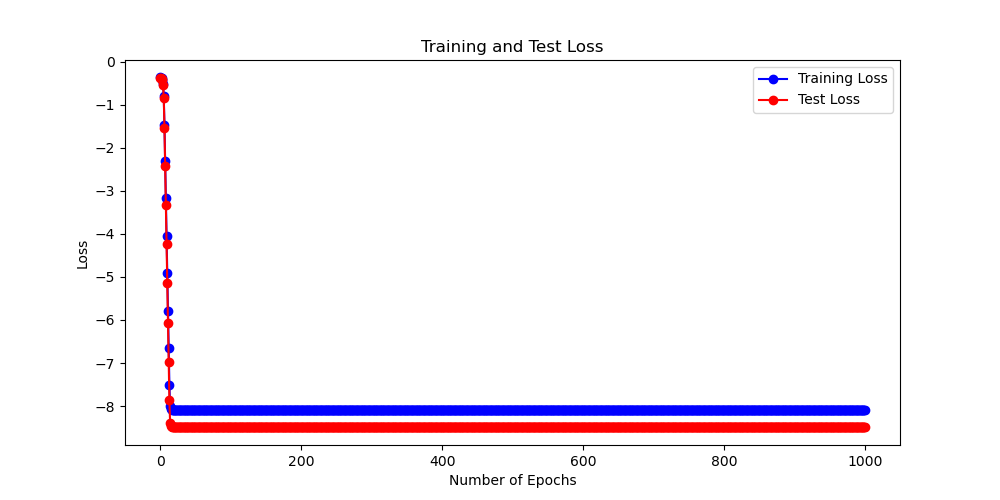

In [95]:
%matplotlib notebook
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(np.arange(0,num_epochs),losses_train,marker = 'o',color='b',label = "Training Loss")
ax.set_title("Training and Test Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Loss")
ax.plot(np.arange(0,num_epochs),losses_test,marker = 'o',color='r',label = "Test Loss")
# ax.set_xticks(np.arange(0,num_epochs/))

ax.legend()

In [96]:
Ypred_train = convert(ypred_train_epoch.detach())
Ypred_test = convert(ypred_test_epoch.detach())

In [97]:
cnt = 0

for h in range(len(Y_train)):
    if sum(Ypred_train[h,:] == Y_train[h,:]) < Y_train.shape[1]:
        cnt = cnt + 1
wrong = cnt/len(Y_train)
print(f"Training Accuracy: {100 - wrong*100}")
print("Incorrect Training predictions: ", cnt)
print("Total Training predictions: ", len(Y_train))
    
    
cnt_test = 0
for j in range(len(Y_test)):
    if sum(Ypred_test[j,:] == Y_test[j,:]) < Y_test.shape[1]:
        cnt_test = cnt_test + 1
wrong_test = cnt_test/len(Y_test)
print("====="*10)
print(f"Testing Accuracy: {100 - wrong_test*100}")
print("Incorrect Test predictions: ", cnt_test)
print("Total Testing predictions: ", len(Y_test))

Training Accuracy: 34.04689092762487
Incorrect Training predictions:  1294
Total Training predictions:  1962
Testing Accuracy: 30.796670630202144
Incorrect Test predictions:  582
Total Testing predictions:  841


In [85]:
Ypred_test

tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [86]:
Y_test

tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])